In [10]:
import pandas as pd
import numpy as np
import json


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append('../')
import wrangle

In [3]:
datadf, dictionarydf = wrangle.wrangle_data(path_prefix='../')

In [4]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 284 to 2
Data columns (total 78 columns):
job_title                         726 non-null category
job_taxo                          726 non-null category
job_id                            723 non-null category
job_conduct_res                   726 non-null int64
job_analyze_res                   726 non-null int64
job_buy_res_report                726 non-null int64
job_manage_res_proj               726 non-null int64
job_observe_res                   726 non-null int64
job_plan_res                      726 non-null int64
job_teach_res                     726 non-null int64
job_advocate_res                  726 non-null int64
job_hire_res_vendor               726 non-null int64
job_lead_res_team                 726 non-null int64
num_employees                     723 non-null category
num_researchers                   722 non-null category
primary_industry                  726 non-null category
types_res_used               

In [5]:
dictionarydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, q00 to x01
Data columns (total 11 columns):
column_name       79 non-null object
is_required       79 non-null bool
from_orig_file    79 non-null bool
in_wrangle        79 non-null bool
char_type         79 non-null object
function          79 non-null object
data_type         79 non-null object
encoder           59 non-null object
survey_section    78 non-null object
question_group    78 non-null object
question_text     78 non-null object
dtypes: bool(3), object(8)
memory usage: 8.3+ KB


In [7]:
datadf[['learning_conference', 'likely_conference']].describe()

,learning_conference,likely_conference
count,726.000000,726.000000
mean,1.663912,2.250689
std,0.761119,1.143723
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,3.000000
max,3.000000,4.000000


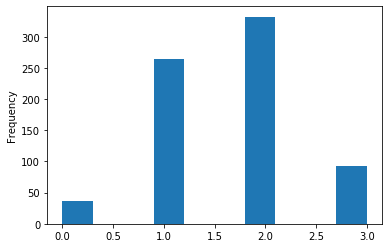

In [11]:
datadf.learning_conference.plot.hist()
plt.show()

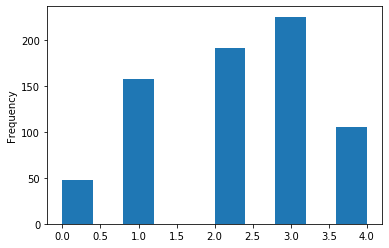

In [12]:
datadf.likely_conference.plot.hist()
plt.show()

In [ ]:
def get_objs(df, **kwargs):
    '''
    get_objs(df, **kwargs)
    RETURNS pd Series
    '''
    return df.columns[df.dtypes=='object']

In [ ]:
def get_uniques(df, max_uniques=10, target_col='', **kwargs):
    '''
    get_uniques(df, max_uniques=10, target_col='', **kwargs)
    RETURNS summary dataframe
    Receives dataframe as input, examines all columns defined as objects, and
    returns a summary report with column name as its index.
    Report showss on the number of unique values (column 'nunuiques') within 
    each column and provides the unique values column('uniques') if the unique 
    value count is is less than or equal to max_uniques.
    If the input dataframe contains the target column, enter that name as the 
    target_col argument so it can be removed from the analysis.
    '''
    df_objs = pd.DataFrame(get_objs(df), columns=['cols'])
    df_objs = df_objs[df_objs.cols != target_col]
    df_objs['nuniques'] = df_objs.cols.apply(lambda x: df[x].nunique())
    df_cats = df_objs[df_objs.nuniques <= max_uniques]
    df_cats['uniques'] = df_cats.cols.apply(lambda x: df[x].unique())
    df_objs = df_objs.join(df_cats.uniques, how='left')
    return df_objs.set_index('cols')

In [ ]:
df_uniques = get_uniques(df, truncate=False).sort_values('cols')
df_uniques.to_json('df_uniques.json')

In [ ]:
df_uniques

In [ ]:
qlib = pd.read_csv('question_library.txt').dropna().set_index('qid2')
qlib['col'] = qlib.index
qlib

In [ ]:
checkcol = 'q19g'
use_dict = dict_list[qlib.cat_lib[checkcol]]
print(use_dict)


encoded = df[checkcol].apply(lambda x: use_dict[x])
encoded.head(10)

In [ ]:
def encode_columns(df, cols, dicts, check_dicts):
#     print('***** cols *****')
#     print(cols.head())
#     print('***** dicts *****')
#     print(dicts)
#     print('***** check_dicts *****')
#     print(check_dicts.head())
    for col in cols:
#         print('*****\n','col',col)
        use_dict = dicts[check_dicts[col]]
#         print(use_dict)
        encoded = df[col].apply(lambda x: use_dict[x])
#         print('*****\n',encoded.head())
        df[col] = encoded
    return df
    pass
    

In [ ]:
df2 = df.copy()
# display(df2.info())
display(df2.head())

encode_columns(df=df2, cols=qlib.col, dicts=dict_list, check_dicts=qlib.cat_lib)
display(df2.head())
df2.info()

In [13]:
x = !pwd
x

['/Users/kevineliasen/GoogleDrive/CodingStuff/Codeup/Capstone/kev']

In [ ]:
data_dictionary = pd.read_excel('../data_files/data_dictionary.xlsx')